## install dependencies and import libraries

In [1]:
!pip install tensorflow
!pip install opencv-python 
!pip install mediapipe 
!pip install scikit-learn
!pip install matplotlib

#tensorflow: popular deep learning framework.
#opencv-python: library for computer vision to access our webcam and extract keypoints .
#mediapipe: mediapipe holistic lets you get the body keypoints.
#sklearn: ML library provides tools for accuracy evaluation and train-test split .
#matplotlib: visualize the images

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 2.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/1.7 MB 1.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.7 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.7 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 1.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 930.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 855.7 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 840.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 849.3 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.7 MB 846.3 kB/s eta 0:00:02
   ---------- --

In [1]:
import numpy as np  #work with the arrays (structure the dataset)
import cv2   #openCV
import os    #work with file paths
from matplotlib import pyplot as plt   #visualize img
import time   # for a sleep between each frame that we collect
import mediapipe as mp 

## Get the keypoints using mediapipe holistic

In [2]:
# create 2 variables - MP holistic(download & leverage holistic model) 
                       #MP drawing utilities (draw keypoints on the face)
mp_holistic=mp.solutions.holistic
mp_draw=mp.solutions.drawing_utils

In [3]:
#to detect the landmarks/ keypoints in img using MP model
def mediapipe_detection(image,model): 
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #colour conversion -bgr to rgb
    image.flags.writeable=False  #image is not longer writeable
    results=model.process(image)  #make detection using MP. here img is the frame from openCV
    image.flags.writeable=True  #image is now writeable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #colour conversion - rgb to bgr
    return image, results    # Return the processed image and the detection results

In [4]:
#to render the results i.e landmarks onto the image
def draw_landmark(image,results):
    mp_draw.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)
    mp_draw.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_draw.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_draw.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

#1st argument:input image onto which landmarks will be drawn 
#2nd argument:contains the detected landmarks
# 3rd argument: specifies which landmarks should be connected with lines to form a complete structure of face,hand etc


In [10]:
mp_draw.draw_landmarks?

Signature:
mp_draw.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Docstring:
Draws the landmarks and the connections on the image.

Args:
  image: A three channel BGR image represented as numpy ndarray.
  landmark_list: A normalized landmark list proto message to be annotated on
    the image.
  connections: A list of landmark index tuples that specifies how landma

In [5]:
capture = cv2.VideoCapture(0) #access our webcam and read feed in capture

#to access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #loop through the frames in our camera
    while capture.isOpened():
      #read feed : get 2 values - return val and frame
      ret, frame = capture.read() 
    
      #make detections
      image,results = mediapipe_detection(frame,holistic) 
      print(results)

      #draw landmarks on the image (applied on processed image returned from the mediapipe_detection() function )
      draw_landmark(image,results )
        
      #show to the screen
      cv2.imshow('openCV Feed Display', image)
    
      #break out of loop if u press key q
      if cv2.waitKey(10) & 0xFF== ord('q'):
        break
    
    #release our webcam and break out of loop gracefully
    capture.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
#testing if the landmarks are getting detected

results.face_landmarks.landmark
#.landmark - to get it in the form of a list
#x: x-axis position y: y-axis position #z: relative distance from camera

[x: 0.58045524
y: 0.5640404
z: -0.03267163
, x: 0.5786726
y: 0.5163881
z: -0.058101777
, x: 0.5799159
y: 0.53291494
z: -0.031449158
, x: 0.5691785
y: 0.47285315
z: -0.042147793
, x: 0.5781776
y: 0.5017139
z: -0.061540883
, x: 0.5779787
y: 0.4838964
z: -0.056907963
, x: 0.577933
y: 0.44202685
z: -0.02636711
, x: 0.50255466
y: 0.44898942
z: 0.01980154
, x: 0.57705677
y: 0.40499747
z: -0.018439215
, x: 0.5764079
y: 0.3843416
z: -0.020221265
, x: 0.5747975
y: 0.31507915
z: -0.007796075
, x: 0.5806939
y: 0.57114947
z: -0.031372093
, x: 0.5811201
y: 0.57652676
z: -0.027863348
, x: 0.5815931
y: 0.5785197
z: -0.023117332
, x: 0.5820299
y: 0.5817396
z: -0.023335535
, x: 0.5821375
y: 0.5872735
z: -0.025228234
, x: 0.5823349
y: 0.59463257
z: -0.027668452
, x: 0.58277637
y: 0.603186
z: -0.026430752
, x: 0.5840154
y: 0.6190075
z: -0.016550368
, x: 0.5791463
y: 0.5243428
z: -0.052742973
, x: 0.57092357
y: 0.5246119
z: -0.037850168
, x: 0.4642297
y: 0.3967991
z: 0.075988956
, x: 0.53340507
y: 0.45980

In [7]:
#testing if the landmarks are getting detected

len(results.right_hand_landmarks.landmark)

21

In [62]:
#testing- trying to display landmark on image
#once the loop ends, u can access the last frame
frame

array([[[105,  68,  91],
        [104,  68,  90],
        [104,  72,  91],
        ...,
        [245, 243, 245],
        [245, 243, 245],
        [245, 243, 245]],

       [[103,  67,  90],
        [102,  67,  90],
        [103,  70,  90],
        ...,
        [245, 243, 245],
        [245, 243, 245],
        [245, 243, 245]],

       [[102,  68,  92],
        [103,  69,  92],
        [106,  74,  95],
        ...,
        [245, 243, 245],
        [245, 243, 245],
        [245, 243, 245]],

       ...,

       [[255, 175, 156],
        [255, 180, 161],
        [255, 177, 156],
        ...,
        [100,  44,  62],
        [101,  50,  64],
        [ 97,  47,  61]],

       [[255, 197, 170],
        [255, 201, 174],
        [255, 198, 170],
        ...,
        [103,  44,  62],
        [105,  49,  64],
        [103,  50,  64]],

       [[255, 215, 185],
        [255, 221, 191],
        [255, 221, 191],
        ...,
        [104,  42,  62],
        [106,  48,  64],
        [103,  47,  62]]

In [63]:
#draw_landmarks to draw the result on the last frame
draw_landmark(frame,results)

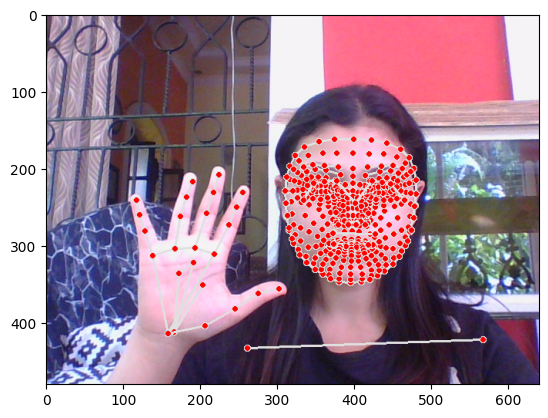

In [64]:
#use plt to visualize our frame 
#use cv2.CVTcolor to change to rgb
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

 ## extract the keypoint values 

#### main part of this section

In [5]:
#results are passed from the mediapipe loop above 
def extract_keypoints(results):
    
    pose=np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten()  if results.pose_landmarks else np.zeros(132)
    lh=np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  
    rh=np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten()  if results.face_landmarks else np.zeros(1404) #468*3
    
    #concatenate each of these keypoints
    return np.concatenate([pose,lh,rh,face])



In [9]:
res_test=extract_keypoints(results)   #  33*4+21*3+21*3+468*3 = 1662  shape:(1662,)  

In [10]:
res_test

array([ 0.5774309 ,  0.51031995, -0.8154763 , ...,  0.66454697,
        0.4273265 ,  0.01184651])

In [11]:
np.save('0',res_test)

In [12]:
np.load('0.npy')

array([ 0.5774309 ,  0.51031995, -0.8154763 , ...,  0.66454697,
        0.4273265 ,  0.01184651])

#### basic understanding of how it works, consider pose

In [13]:
len(results.pose_landmarks.landmark)

33

In [28]:
#iterate over each landmark
#extract specific info from each landmark (x,y,z,visibility)
# each landmark in the list of landmarks contains a list of info
#np.array converts list of lists into a NumPy array.
#.flatten(): This flattens the NumPy array, converting it into a one-dimensional array.
#the if conditon is for error handling, 
#i.e incase the landmark is not detected,display np array with zeros) 132=33*4
pose=np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten()if results.pose_landmarks else np.zeros(132)
            


In [29]:
pose

array([ 7.05323458e-01,  6.58178270e-01, -7.83933401e-01,  9.99941111e-01,
        7.40351319e-01,  5.85017502e-01, -7.17791200e-01,  9.99893606e-01,
        7.61789918e-01,  5.85693300e-01, -7.17725217e-01,  9.99855876e-01,
        7.82294154e-01,  5.87070882e-01, -7.17992663e-01,  9.99881685e-01,
        6.76243246e-01,  5.84422886e-01, -6.82660460e-01,  9.99903083e-01,
        6.57065451e-01,  5.85011780e-01, -6.81698501e-01,  9.99882340e-01,
        6.37897253e-01,  5.86048424e-01, -6.82165563e-01,  9.99920785e-01,
        8.17968190e-01,  6.13676786e-01, -2.95355111e-01,  9.99878764e-01,
        6.16183698e-01,  6.15620852e-01, -9.01304036e-02,  9.99937117e-01,
        7.36708224e-01,  7.41309285e-01, -6.35915875e-01,  9.99935389e-01,
        6.58141017e-01,  7.33547449e-01, -5.80797791e-01,  9.99944508e-01,
        9.43583965e-01,  9.76999938e-01, -1.89274982e-01,  9.97924626e-01,
        4.93312746e-01,  9.46984410e-01,  2.34919079e-02,  9.99617815e-01,
        1.14200854e+00,  

## Setup the folder for our array collection 

In [6]:
# because we want to extract the keypoints to decode our sign lang

DATA_PATH=os.path.join('MP_DATA')   #path for the exported data (numpy arrays)
                                    #os.path.join(): used to create the path by joining'MP_DATA' directory with the current working directory.
#some important actions that we want to detect (sign language gestures)
actions=np.array(['hello','thankyou','iloveyou','yes','no','help','great/wonderful','please','sorry','goodbye'])

#use 30 frames to classify the action  , i.e collect data for 10 actions, 30*1662 keypoints to make the detection

#30 videos worth of data  (30 samples collected for each action)
no_sequences=30

#videos are going to be 30 frames in length 
sequence_length=30

In [7]:
#the following loop creates 1 folder for each action
#within each action folder, we create subfolders - so in total 30 vids in each folder
#store 30 frames in each of these subfolders (stored as numpy arrays) 

#hello 
##0
##1
##...
##29

#thanks

#ily

#....and so on


In [7]:
for action in actions:    #loop through all actions
    for sequence in range(no_sequences):    #loop through 30 different videos 
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))  #make subdirectories for each , if already exists then pass
                                                                       #it'll create MP_DATA folder,folder for action, sequence folder
        except:
            pass
                        

## Collect the keypoint values for training and testing 

In [21]:
capture = cv2.VideoCapture(0) #access our webcam and read feed in capture

#to access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #loop through our actions
    for action in actions:
        #loop through sequences
        for sequence in range(no_sequences):
            #loop through the video length i.e sequence length  (for 30 frames with keypoints)
            for frame_num in range(sequence_length):
            
                  #read feed : get 2 values - return val and frame
                  ret, frame = capture.read() 
                
                  #make detections
                  image,results = mediapipe_detection(frame,holistic) 
                  print(results)
            
                  #draw landmarks on the image (applied on processed image returned from the mediapipe_detection() function )
                  draw_landmark(image,results )

                 # wait logic between the videos
                  if frame_num==0:
                        cv2.putText(image,'STARTING COLLECTION',(120,200),              #print STARTING COLLECTION in the middle of screen
                                    cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA) #font,font size,font colour(BGR),line width,line type
                        cv2.putText(image,'Collecting Frames For {} Video Number {}'.format(action,sequence),(15,20),
                                     cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                        #show to the screen
                        cv2.imshow('openCV Feed Display', image)
                        cv2.waitKey(2000) #2 sec break b/w each video 
                  else:
                        cv2.putText(image,'Collecting Frames For {} Video Number {}'.format(action,sequence),(15,20),
                                     cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                        #show to the screen
                        cv2.imshow('openCV Feed Display', image)


                  #keypoint extraction
                  keypoints=extract_keypoints(results)
                  #saves the keypoints as a numpy array at that path
                  npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                  np.save(npy_path,keypoints)  
                                                            
    
                  #break out of loop if you press key q
                  if cv2.waitKey(10) & 0xFF== ord('q'):
                    break
    
    #release our webcam and break out of loop gracefully
    capture.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [50]:
#capture.release() is used to release the video capture resource
#cv2.destroyAllWindows() is used to close any open OpenCV windows, 
#ensuring proper resource management and a clean user interface.

capture.release()
cv2.destroyAllWindows()

##   Create Labels & Features AND Preprocess The Data

In [8]:
from sklearn.model_selection import train_test_split #partition data into train & test
from tensorflow.keras.utils import to_categorical    #to convert data to one hot encoded data

In [9]:
label_map={label:num for num,label in enumerate(actions)} 
#create a label mapping dictionary by looping through each action
#each action label is associated with a numerical identifiergive a 

In [10]:
label_map #to view it's structure

{'hello': 0,
 'thankyou': 1,
 'iloveyou': 2,
 'yes': 3,
 'no': 4,
 'help': 5,
 'great/wonderful': 6,
 'please': 7,
 'sorry': 8,
 'goodbye': 9}

In [11]:
 #create 2 blank arrays
#sequences-Xdata(feature data)
#labels- Ydata(labels)
sequences, labels=[], [] 

#loop through each of our actions
for action in actions:     
    #loop through each of the sequences(30 videos)
    for sequence in range(no_sequences):
        #create a blank array window
        #it will represent all the frames we got for that particular sequence
        window=[]

        #loop through each of the frames (1 video(sequence) will be 30 frames in length)
        for frame_num in range(sequence_length):
            #load the numpy array for the current frame
            #store it in res
            #append it to the window array
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
            
         #then we grab our window (video) and append it to sequences array
        #by the end of it, sequences array will have 10*30 videos represented in it, each one of those will have 30 frames each
        sequences.append(window)
        labels.append(label_map[action])  #each action represented by its corresponding numerical label from label_map
                        

In [12]:
np.array(sequences).shape

#this contains all of our data
#300->videos
#30->30 frames each
#1662->each frame has 1662 keypoints

(300, 30, 1662)

In [13]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [14]:
np.array(labels).shape

(300,)

### preprocessing data

In [15]:
X=np.array(sequences)

In [16]:
X.shape

(300, 30, 1662)

In [17]:
Y= to_categorical(labels).astype(int)

#deep learning models require categorical variables to be one-hot encoded,
#One-hot encoding converts each integer label into a binary vector,
#where only one element (the position corresponding to the class) is 1, and all others are 0.

In [18]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [19]:
Y.shape

(300, 10)

### train-test partition

In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.05)
#95%->training
#5%->testing

In [157]:
#testing the 80-20 split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
#80%->training
#20%->testing

In [21]:
X_train.shape    #285 sequences
                 #30 frames
                 #1662 keypoints

(285, 30, 1662)

In [22]:
X_test.shape  #15 sequences

(15, 30, 1662)

In [23]:
Y_train.shape  #285 samples 
               #10 categories

(285, 10)

In [24]:
Y_test.shape

(15, 10)

## Train the LSTM Neural Network

In [162]:
from tensorflow.keras.models import Sequential   #sequential NN
from tensorflow.keras.layers import LSTM, Dense,Dropout     #import lstm layer and Dense(fully connected)layer
from tensorflow.keras.callbacks import TensorBoard #to monitor our model as it is training (tool to visualize training metrics)

In [27]:
#create a log directory and set up tensorboard callback
#we can bring up the logs as the model is training
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)


#### neural network architecture

In [163]:
#1
model=Sequential()    #instantiate the model

#add 3 sets of lstm layers

#lstm with 64 units
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
#128 units
model.add(LSTM(128,return_sequences=True,activation='relu'))
#64 units
model.add(LSTM(64,return_sequences=False,activation='relu'))

#add the dense layers(fully connected layers)
#Each neuron in this layer will be fully connected to all the neurons in the previous layer.

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

#add the output layer to the model with a number of neurons equal to the number of classes in our classification task (i.e., the number of actions)
#actions.shape[0]: determines the number of neurons in the output layer=the number of different actions.
#activation='softmax': converts the raw output scores into probability distributions over the classes

#### compile the model

In [164]:
# Configure the learning process
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model.summary())

#Adam optimizer adjusts the learning rate for each parameter by minimizing error during training
#categorical_crossentropy loss function is used for multi-class classification model


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_44 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_45 (LSTM)              (None, 64)                49408     
                                                                 
 dense_39 (Dense)            (None, 64)                4160      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 10)                330       
                                                                 
Total params: 596906 (2.28 MB)
Trainable params: 5969

In [165]:
X_train.shape

(240, 30, 1662)

#### fit and train the model

In [166]:
model.fit(X_train,Y_train,epochs=200,callbacks=[tb_callback])

Epoch 1/200
8/8 [==============================] - 8s 87ms/step - loss: 61.1399 - categorical_accuracy: 0.0833
Epoch 2/200
8/8 [==============================] - 1s 82ms/step - loss: 18.6053 - categorical_accuracy: 0.1042
Epoch 3/200
8/8 [==============================] - 1s 81ms/step - loss: 21.3633 - categorical_accuracy: 0.1167
Epoch 4/200
8/8 [==============================] - 1s 81ms/step - loss: 8.3401 - categorical_accuracy: 0.1042
Epoch 5/200
8/8 [==============================] - 1s 79ms/step - loss: 7.1251 - categorical_accuracy: 0.0917
Epoch 6/200
8/8 [==============================] - 1s 79ms/step - loss: 4.6004 - categorical_accuracy: 0.1458
Epoch 7/200
8/8 [==============================] - 1s 79ms/step - loss: 4.2098 - categorical_accuracy: 0.1167
Epoch 8/200
8/8 [==============================] - 1s 79ms/step - loss: 4.6908 - categorical_accuracy: 0.1083
Epoch 9/200
8/8 [==============================] - 1s 80ms/step - loss: 5.5717 - categorical_accuracy: 0.1125
Epoch 1

## model prediction

In [167]:
# Predictions on the Test Set
# evaluate() function assesses the performance of the LSTM model on the test data.
result = model.evaluate(X_test, Y_test, verbose=1)

2/2 [==============================] - 1s 49ms/step - loss: 1.0491 - categorical_accuracy: 0.7167


In [26]:
result = loaded_model.evaluate(X_test, Y_test, verbose=1)


1/1 [==============================] - 2s 2s/step - loss: 0.1213 - categorical_accuracy: 0.9333


In [33]:
actions[np.argmax(res[2])]

'hello'

In [34]:
actions[np.argmax(Y_test[2])]

'hello'

## Save Model

In [174]:
model.save('my_model3.h5')

C:\Users\Quisha Coutinho\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model2.h5')


## Evaluate the model 

In [35]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import multilabel_confusion_matrix

In [176]:
#train set
yhat = model.predict(X_train)

8/8 [==============================] - 1s 29ms/step


In [36]:
yhat=loaded_model.predict(X_train) #loaded model

9/9 [==============================] - 2s 64ms/step


In [37]:
ytrue=np.argmax(Y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [38]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[256,   1],
        [  0,  28]],

       [[255,   1],
        [  1,  28]],

       [[256,   1],
        [  0,  28]],

       [[256,   0],
        [  1,  28]],

       [[256,   0],
        [  1,  28]],

       [[255,   1],
        [  0,  29]],

       [[258,   0],
        [  1,  26]],

       [[256,   0],
        [  2,  27]],

       [[255,   2],
        [  0,  28]],

       [[256,   0],
        [  0,  29]]], dtype=int64)

In [39]:
accuracy_score(ytrue,yhat)

0.9789473684210527

In [179]:
#test set
yhat = model.predict(X_test)

2/2 [==============================] - 0s 46ms/step


In [40]:
yhat=loaded_model.predict(X_test) #loaded model

1/1 [==============================] - 0s 114ms/step


In [41]:
ytrue=np.argmax(Y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [42]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 1,  0]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]],

       [[13,  1],
        [ 0,  1]],

       [[12,  0],
        [ 0,  3]],

       [[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]]], dtype=int64)

In [43]:
accuracy_score(ytrue,yhat)

0.9333333333333333

## Test The model in real time

In [49]:
# Detection variables
sequence = []  # Collect 30 frames to generate the prediction
sentence = []  # To store the detected action words
threshold = 0.2  # Render the result only if it is above this threshold

capture = cv2.VideoCapture(0)  # Access our webcam and read feed in capture

# To access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through the frames in our camera
    while capture.isOpened():
        # Read feed
        ret, frame = capture.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_landmark(image, results)

        # Prediction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)  # Append the extracted keypoints to the sequence buffer
        sequence = sequence[-30:]  # Keep only the most recent 30 frames in the sequence buffer

        if len(sequence) == 30:
            #res = model.predict(np.expand_dims(sequence, axis=0))[0]
            res = loaded_model.predict(np.expand_dims(sequence, axis=0))[0]
            detected_action = actions[np.argmax(res)]

            # Rendering the predicted sign as text on the image
            if res[np.argmax(res)] > threshold:  # Check if the confidence score of the predicted sign is higher than a threshold
                sentence = [detected_action]  # Store only the last detected action word

        # Draw a rectangle on the top of the image as background for the text
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        # Add the detected action word to the image as text
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the image
        cv2.imshow('OpenCV Feed Display', image)

        # Break out of loop if 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the webcam and close the OpenCV windows
capture.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
capture.release()
cv2.destroyAllWindows()